# Assignment 3 - Numerical algorithms - s214643

## 1) Multiple choice

### A. Numerical methods for solving ordinary differential equations

2. Eulers method

### B. Systems of ordinary differential equations.
3. System of 4 equations

### C. Initial value problems.
3. Of order $O(h^4)$ for both methods

### D. Runge-Kutta method.
2. h $\approx$ 0.025

## 2) Initial-value problem

#### 1. Write system of first order differential equations
First we write the two equations
$$
\begin{align*}
x'' &= x^2 - y + e^t \\
y'' &= x-y^2-e^t
\end{align*}
$$
we translate the system to new variables
$$
\begin{align*}
z_3' &= z_1^2 - z_2 + e^t \\
z_4' &= z_1 - z_2^2-e^t
\end{align*}
$$
And then write the equations as a system of first order ODE's
$$
Z'(t) = 
\begin{bmatrix}
        z'_1 \\
        z'_2 \\
        z'_3 \\
        z'_4
\end{bmatrix}
=
\begin{bmatrix}
        z_3 \\
        z_4 \\
        z_1^2 - z_2 + e^t \\
        z_1 - z_2^2-e^t
\end{bmatrix}
$$
And the initial values can be written as:
$$
Z(0) = 
\begin{bmatrix}
        0 \\
        1 \\
        0 \\
        -2
\end{bmatrix}
$$

#### 2. Right hand side function
We write a function to return the system of ODE's to an array and a variable containing the initial values

In [50]:
import numpy as np
def right_hand_side(t, z):
    return np.array([
        z[2],
        z[3],
        z[0] ** 2 - z[1] + np.exp(t),
        z[0] - z[1]**2 -np.exp(t)
    ])

initial = np.array([
    0,
    1,
    0,
    -2
], dtype = float)

#### 3. Apply RK4
Then we define the fourth order RK method for systems

In [51]:
import math
def RK4system(fs, a, b, initial, h):
    n = math.floor((b-a)/h)
    t = a
    h2 = h / 2
    xs = initial.copy()
    xs_list, ta = [xs], [t]
    for _ in range(n):
        k1 = h * fs(t, xs)
        k2 = h * fs(t + h2, xs + 0.5 * k1)
        k3 = h * fs(t + h2, xs + 0.5 * k2)
        k4 = h * fs(t + h, xs + k3)

        xs += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h 
        
        xs_list.append(xs.copy())
        ta.append(t)
    return xs_list, ta

And use to RK4 to find values for $(x(2), y(2))$ for $h = 2^{-4}$ and $h =  2^{-5}$

In [58]:
for k in [4,5]:
    x, t = RK4system(right_hand_side, 0, 2, initial, 2**-k)
    print(f'k = {k}, x(2) = {round(x[-1][0], 4)}, y(2) = {round(x[-1][1], 4)}')

k = 4, x(2) = 10.0878, y(2) = -21.0605
k = 5, x(2) = 10.0881, y(2) = -21.0622


## 3) The shooting method for a nonlinear differential equation

#### 1. Find $\varphi(z)$

Again we write the differential equation and translate to a system of first order ODE's \
This allows os to use RK4 to solve the differential equation

$$
7y'' + y' -y^2 + x = 0
$$

$$
y''= (-y' + y^2 - x)/7
$$

$$
\begin{bmatrix}
    x_1\\
    x_2
\end{bmatrix}
=
\begin{bmatrix}
    x_2\\
    (-x_2 + x_1^2 - t)/7
\end{bmatrix}
$$

Like in task 2, we define right hand side and initial values. \
This time the initial values are a funciton of z.

In [81]:
def right_hand_side(t, x):
    return np.array([
        x[1],
        (-x[1] + x[0]**2 - t)/7
    ])

initial = lambda z: np.array([
        7,
        z
    ], dtype=float)

phi = lambda z: RK4system(right_hand_side, 0, 2, initial(z), h=10**(-4))[0][-1][0]
phi = np.vectorize(phi)

#### 2. Boundry value problem

In [129]:
z = np.linspace(-50,0,51,endpoint=True)
y = phi(z)
y

array([  5.48213973,   4.74095425,   4.00749703,   3.28173318,
         2.56366453,   1.85333341,   1.15082699,   0.45628228,
        -0.23010828,  -0.90809032,  -1.57734022,  -2.23745667,
        -2.88795102,  -3.52823626,  -4.15761431,  -4.77526143,
        -5.38021142,  -5.97133622,  -6.54732344,  -7.10665041,
        -7.64755396,  -8.16799526,  -8.66561878,  -9.13770433,
        -9.58111075,  -9.9922096 , -10.36680702, -10.70005115,
       -10.98632217, -11.21910125, -11.39081374, -11.49264086,
       -11.51429254, -11.44373237, -11.26684286, -10.96701613,
       -10.52465103,  -9.91653167,  -9.11505505,  -8.08726548,
        -6.79363922,  -5.18654425,  -3.20827383,  -0.78851571,
         2.15893281,   5.74046811,  10.08837355,  15.36843325,
        21.79023327,  29.62127688,  39.20659606])

We calculate the values of $\varphi$ as a function of $z$.

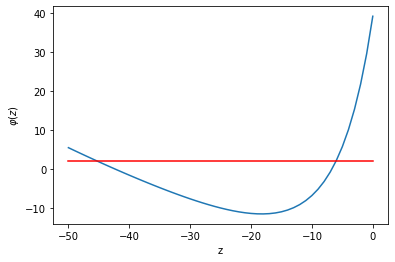

In [97]:
import matplotlib.pyplot as plt
plt.plot(z, y)
plt.plot((-50,0),(2,2), 'r')
plt.xlabel('z')
plt.ylabel(r'$\varphi(z)$')
plt.show()

As seen above $\varphi$ is not a linear function. We have to solutions two $\varphi(z) = 2$.

#### 3. Find $\varphi(z) = 2$

In [102]:
def secant(a, b, nmax, f, dx):
    fa = f(a) - dx
    fb = f(b) - dx 
    x = [a, b]
    for _ in range(nmax - 1):
        d = fb * (b - a) / (fb - fa)
        a = b
        fa = fb
        b = b - d
        fb = f(b) - dx
        x.append(b)
    return x

z1 = secant(-50, -40, 5, phi, 2)[-1]
z2 = secant(-10, 0, 5, phi, 2)[-1]

In [104]:
print(f'z1 = {round(z1,4)}, z2 = {round(z2,4)}')

z1 = -45.2074, z2 = -6.0722


Using the secant method for finding roots (with intervals [-50;-40] and [-10;0]) we get two values for $z$ that satisfies $\varphi(z) = 2$.

#### 4. Plotting the two trajectories found with the RK4 method

In [121]:
x1, t1 = RK4system(right_hand_side, 0, 2, initial(z1), h=10**(-4))
x2, t2 = RK4system(right_hand_side, 0, 2, initial(z2), h=10**(-4))

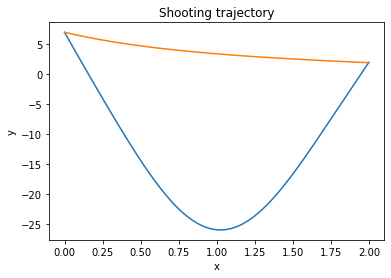

In [128]:
plt.plot(t1[1:], np.array(x1)[1:,0])
plt.plot(t2[1:], np.array(x2)[1:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shooting trajectory')
plt.show()